# Project 7 -- Jacqueline Sanchez

**TA Help:** N/A

- 
    
**Collaboration:** N/A
    
- 
- 

## Question 1

In [1]:
# code here
# reading my data
library(data.table)
myDF <- fread("/anvil/projects/tdm/data/death_records/DeathRecords.csv") 
head(myDF, 2)

Id,ResidentStatus,Education1989Revision,Education2003Revision,EducationReportingFlag,MonthOfDeath,Sex,AgeType,Age,AgeSubstitutionFlag,...,CauseRecode39,NumberOfEntityAxisConditions,NumberOfRecordAxisConditions,Race,BridgedRaceFlag,RaceImputationFlag,RaceRecode3,RaceRecode5,HispanicOrigin,HispanicOriginRaceRecode
<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,2,1,1,M,1,87,0,...,24,1,1,1,0,0,1,1,100,6
2,1,0,2,1,1,M,1,58,0,...,21,3,3,1,0,0,1,1,100,6


In [2]:
# (a) using the `cut` command to classify people into a table
table(cut(myDF$Age, breaks = c(0, 18, 25, 35, 55, 100)))



  (0,18]  (18,25]  (25,35]  (35,55] (55,100] 
   36033    27691    49540   271181  2229384 

In [3]:
# (b) using option useNA = "always" to find out how many people's ages were unknown at the time of their death. 
table(cut(myDF$Age, breaks = c(0, 18, 25, 35, 55, Inf)), useNA = "always")


  (0,18]  (18,25]  (25,35]  (35,55] (55,Inf]     <NA> 
   36033    27691    49540   271181  2246726        0 

In [4]:
# (c) adding labels
table(cut(myDF$Age, breaks = c(0, 18, 25, 35, 55, 100), labels = c("youth", "young adult", "adult", "middle age adult", "senior adult")),useNA = "always")


           youth      young adult            adult middle age adult 
           36033            27691            49540           271181 
    senior adult             <NA> 
         2229384            17342 

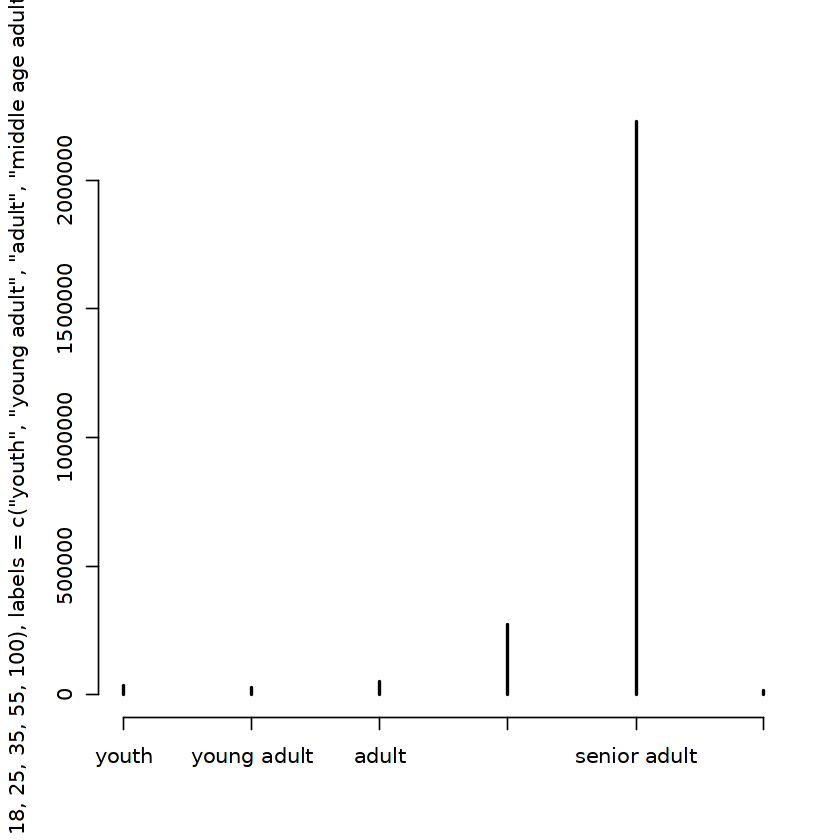

In [5]:
# (d) Wrapping the table into a barplot
plot(table(cut(myDF$Age, breaks = c(0, 18, 25, 35, 55, 100), labels = c("youth", "young adult", "adult", "middle age adult", "senior adult")),useNA = "always"))

Markdown notes and sentences and analysis written here.

## Question 2

In [6]:
# code here
myDF <- fread("/anvil/projects/tdm/data/8451/The_Complete_Journey_2_Master/5000_transactions.csv")
head(myDF)

BASKET_NUM,HSHD_NUM,PURCHASE_,PRODUCT_NUM,SPEND,UNITS,STORE_R,WEEK_NUM,YEAR
<int>,<int>,<chr>,<int>,<dbl>,<int>,<chr>,<int>,<int>
24,1809,03-JAN-16,5817389,-1.50,-1,SOUTH,1,2016
24,1809,03-JAN-16,5829886,-1.50,-1,SOUTH,1,2016
34,1253,03-JAN-16,539501,2.19,1,EAST,1,2016
60,1595,03-JAN-16,5260099,0.99,1,WEST,1,2016
60,1595,03-JAN-16,4535660,2.50,2,WEST,1,2016
168,3393,03-JAN-16,5602916,4.50,1,SOUTH,1,2016


In [7]:
#  create a logical vector for years 2016 and 2017
year_filter <- (myDF$YEAR == 2016) | (myDF$YEAR == 2017)

# data for valid stores
store_filter <- (myDF$STORE_R == "CENTRAL") | 
                (myDF$STORE_R == "EAST") | 
                (myDF$STORE_R == "SOUTH") | 
                (myDF$STORE_R == "WEST")

# tapply to sum SPEND for the filtered years and stores
result <- tapply(myDF$SPEND[year_filter & store_filter], 
                 list(myDF$YEAR[year_filter & store_filter], myDF$STORE_R[year_filter & store_filter]), 
                 sum)
print(result)

     CENTRAL    EAST   SOUTH    WEST
2016 4471801 5829166 3996751 4754003
2017 4425505 5870281 3961170 4926104


Markdown notes and sentences and analysis written here.

## Question 3

In [8]:
myDF <- fread("/anvil/projects/tdm/data/beer/reviews_sample.csv")
# head(myDF, 1)

In [9]:
# month_filter <- table(month(myDF$date))

In [10]:
# year_filter <- table(year(myDF$date))

In [11]:
# table of the mean score for each month and year pair
tapply(myDF$score,
       list(year(myDF$date), month(myDF$date)), 
       mean)

,1,2,3,4,5,6,7,8,9,10,11,12
1998,3.770000,3.396667,4.092000,3.840000,3.702000,4.700000,3.100000,3.823333,3.355000,3.910000,NA,3.930000
1999,NA,3.613333,NA,NA,3.820000,3.850000,3.880000,NA,NA,3.500000,3.880000,4.000000
2000,NA,4.300000,NA,3.880000,NA,4.470000,3.995000,NA,3.885000,3.880000,4.670000,3.400000
2001,4.220000,4.488000,4.403333,3.053333,NA,4.012000,4.080000,3.905455,4.010556,3.948000,4.112069,3.851053
2002,4.246667,3.706000,3.933846,3.831224,3.887788,3.782655,3.950776,3.628201,3.798758,3.784247,3.885028,3.832537
2003,3.842596,3.921875,3.840573,3.929500,3.895977,3.768022,3.742609,3.710635,3.761452,3.771104,3.790879,3.802826
2004,3.892104,3.822910,3.757987,3.825360,3.826656,3.798576,3.816569,3.861793,3.802122,3.784444,3.741100,3.843094
2005,3.872065,3.805870,3.884944,3.806607,3.743355,3.859615,3.769045,3.784184,3.795644,3.782152,3.855852,3.860837
2006,3.821626,3.789613,3.803201,3.833529,3.816436,3.847766,3.799106,3.795228,3.826782,3.764831,3.802075,3.804746
2007,3.796619,3.820563,3.785231,3.820230,3.768441,3.721336,3.809563,3.710408,3.769330,3.826076,3.779580,3.834992


Markdown notes and sentences and analysis written here.

## Question 4

In [12]:
# code here
library(data.table)
myDF <- fread("/anvil/projects/tdm/data/election/itcont1980.txt", quote="")
names(myDF) <- c("CMTE_ID", "AMNDT_IND", "RPT_TP", "TRANSACTION_PGI", "IMAGE_NUM", "TRANSACTION_TP", "ENTITY_TP", "NAME", "CITY", "STATE", "ZIP_CODE", "EMPLOYER", "OCCUPATION", "TRANSACTION_DT", "TRANSACTION_AMT", "OTHER_ID", "TRAN_ID", "FILE_NUM", "MEMO_CD", "MEMO_TEXT", "SUB_ID")
head(myDF, 2)

CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
<chr>,<chr>,<chr>,<chr>,<int64>,<chr>,<lgl>,<chr>,<chr>,<chr>,...,<chr>,<lgl>,<int>,<int>,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<int64>
C00078279,A,M11,P,80031492155,22Y,NA,"MCKENNON, K R",MIDLAND,MI,...,,NA,10031979,400,,NA,NA,NA,CONTRIBUTION REF TO INDIVIDUAL,3062020110011466469
C00078279,A,M11,,79031415137,15,NA,"OREFFICE, P",MIDLAND,MI,...,DOW CHEMICAL CO,NA,10261979,1500,,NA,NA,NA,,3061920110000382948


In [13]:
# (a) using subset function to get all entries that belong to IN (without NA in TRANSACTION_D)
IN <- subset(myDF, STATE == "IN" & !is.na(TRANSACTION_DT))

# table of donations by CITY
IN_CITIES <- table(IN$CITY)

# # sorting them in descending to get top 41
# sorted_IN_CITIES <- sort(IN_CITIES, decreasing = TRUE)

# # top 41
# top_41_cities <- head(sorted_IN_CITIES, 41)

# print(top_41_cities)
tail(sort(IN_CITIES), 41)


    CHESTERTON    INDIANPOLIS     PLAINFIELD      WALKERTON       HIGHLAND 
            15             15             15             15             16 
 MICHIGAN CITY      MISHAWAKA         HOBART      VINCENNES         WARSAW 
            16             16             17             20             21 
       HAMMOND    NOBLESVILLE    W LAFAYETTE       SYRACUSE WEST LAFAYETTE 
            22             22             22             24             24 
        WABASH        MUNSTER         MUNICE       ANDERSON     VALPARAISO 
            27             30             31             34             34 
   CROWN POINT      GREENWOOD    BLOOMINGTON       RICHMOND       COLUMBUS 
            35             35             38             43             45 
        KOKOMO   MERRILLVILLE           GARY     ZIONSVILLE        LAPORTE 
            45             46             47             52             53 
   TERRE HAUTE      LAFAYETTE         INDPLS     SOUTH BEND        ELKHART 
           

In [14]:
# (b) indexing to get all entries that belong to IN (without NA in TRANSACTION_DT)
IN <- myDF[myDF$STATE == "IN" & !is.na(myDF$TRANSACTION_DT), ]

# Table of donations by CITY
IN_CITIES <- table(IN$CITY)

# # Sorting them in descending order to get top 41
# sorted_IN_CITIES <- sort(IN_CITIES, decreasing = TRUE)

# # Getting the top 41
# top_41_cities <- head(sorted_IN_CITIES, 41)

# # Display the result
# print(top_41_cities)

tail(sort(IN_CITIES), 41)


    CHESTERTON    INDIANPOLIS     PLAINFIELD      WALKERTON       HIGHLAND 
            15             15             15             15             16 
 MICHIGAN CITY      MISHAWAKA         HOBART      VINCENNES         WARSAW 
            16             16             17             20             21 
       HAMMOND    NOBLESVILLE    W LAFAYETTE       SYRACUSE WEST LAFAYETTE 
            22             22             22             24             24 
        WABASH        MUNSTER         MUNICE       ANDERSON     VALPARAISO 
            27             30             31             34             34 
   CROWN POINT      GREENWOOD    BLOOMINGTON       RICHMOND       COLUMBUS 
            35             35             38             43             45 
        KOKOMO   MERRILLVILLE           GARY     ZIONSVILLE        LAPORTE 
            45             46             47             52             53 
   TERRE HAUTE      LAFAYETTE         INDPLS     SOUTH BEND        ELKHART 
           

In [15]:
# I couldnt find anything strange about the top 41 entries

Markdown notes and sentences and analysis written here.

## Question 5

In [16]:
# code here
myDF <- fread("/anvil/projects/tdm/data/flights/subset/1990.csv")
# head(myDF$DepTime, breaks = c(-Inf, 60, 120, 180, 240, 1380, 1440, Inf))

In [17]:
# using cut function to split into categories
delay_categories <- cut(
  myDF$DepDelay,
  breaks = c(-Inf, 0, 60, 120, 180, 240, 300, 1380, 1440, Inf),
  labels = c("Departed Early or On Time", 
             "1-60 minutes late", 
             "61-120 minutes late", 
             "121-180 minutes late", 
             "181-240 minutes late", 
             "241-300 minutes late", 
             "More than 23 hours late", 
             "More than 24 hours late", 
             "Unknown"),
  dig.lab = 4  
)

# creating a table
delay_table <- table(delay_categories, useNA = "always")

print(delay_table)

delay_categories
Departed Early or On Time         1-60 minutes late       61-120 minutes late 
                  2966433                   2111783                    104240 
     121-180 minutes late      181-240 minutes late      241-300 minutes late 
                    24000                      7517                      2630 
  More than 23 hours late   More than 24 hours late                   Unknown 
                     1756                        76                         0 
                     <NA> 
                    52458 


## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.